Ve strojovém učení často pracujeme i s jinými než textovými daty, například s obrázky. Práci s obrázky si vyzkoušíš v tomto úkolu. Jedním z nejznámějších datasetů je MNIST, který obsahuje obrázky rukou psaných číslic:
https://en.wikipedia.org/wiki/MNIST_database
. K obrázkou jsou k dispozici i labels, tj. čísla, která na obrázku jsou. Tento dataset je přímo součástí modulu scikitlearn, a to ve formě číselné matice. Obrázky mají nízké rozlišení (8x8 pixelů, tj. každý obrázek se skládá 64 "políček" - 8 políček v 8 řádích, kterým lze přiřadit barvu) a je černobílý.

Tvým úkolem bude vytvořit model, který dokáže rozpoznat, jaké číslo je na každém z obrázků, přičemž využijeme algoritmus Support Vector Machine (SVM). Dataset si můžeš načíst s využitím následujícího kódu. Kód uloží data, která chceme zpracovat, do proměnné data. Čísla, která na obrázích skutečně jsou (tj. správné odpovědi) jsou v proměnné y.

In [76]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
y = digits.target
data = digits.images

Níže je například matice, která reprezentuje první (v řeči Pythonu nultý) obrázek. Čím vyšší číslo je, tím tmavší je políčko. Čísla jsou v rozsahu 0 až 15.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Obrázek byl vytvořen pomocí modulu matplotlib a funkce imshow, která vykreslí číselnou matici jako obrázek. Pokud vybereme obrázek na pozici 0 a nastavíme černobílé barevné schéma (cmap=plt.cm.gray_r), získáme obrázek, který byl výše.

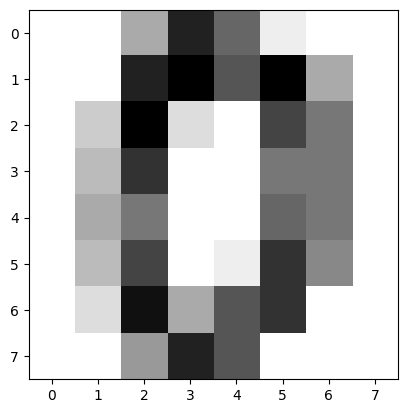

In [77]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

Správnou odpověď najdeme v poli y též na pozici 0.

In [78]:
y[0]

0

Poslední krok je často označován převod dat na flat, tj. na plochá data. Nyní je totiž každé číslo reprezentováno dvourozměrnou maticí 8x8, ale pro použití algoritmu SVC potřebujeme, aby bylo každé číslo reprezentováno jednorozměrně. Můžeš si to představit tak, že chceme, aby každé číslo bylo reprezentováno jedním řádkem v tabulce, která má 64 sloupců.

Můžeme si to ukázat na číslu, které jsme si prohlíželi. Níže je číslo převedené do jednorozměrné formy. Když si čísla porovnáš s předchozím zápisem formou matice, uvidíš stejná čísla, ale pouze jeden pár hranatých závorek. To značí, že jde o jednorozměrné pole, tj. všechna čísla jsou v jednom řádku.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8., 0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])


Tento převod byl proveden pomocí metody reshape(-1), které jsme dali parametr -1, což vede k tomu, že výsledkem je jednorozměrné pole.

In [79]:
data[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

My ale potřebujeme převést všechna čísla, to uděláme příkazem níže. Hodnotou na nulté pozici seznamu říkáme, kolik máme v našem souboru pozorování, takže metoda reshape() vytvoří samostatný řádek každému z čísel.

In [80]:
n_samples = len(data)
data = data.reshape([n_samples, -1])

Nyní je již řada na tobě. Napiš kód, kterým vytvoříš model, který bude klasifikovat obrázek do správné skupiny. Kód je velice blízký tomu, který jsme používali v lekci. Jinými slovy, stačí ti podívat se to materiálů k lekci, není potřeba nic Googlit nebo používat ChatGPT. Ale zakázané to samozřejmě není.

Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.
Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. Nenastavuj ani žádné další parametry.
Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, které pojmenuj y_pred.
Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.

In [81]:
import pandas

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [82]:
# nahrani  datasetu
digits = datasets.load_digits()


In [83]:
# rozdeleni na X a y 
X=pandas.DataFrame(digits.data)
y = digits.target

# rozdeleni na trenovaci a testovaci
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. Nenastavuj ani žádné další parametry.


In [84]:
from sklearn.svm import SVC

In [85]:
clf = SVC(kernel="linear")

Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, které pojmenuj y_pred.

In [86]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.

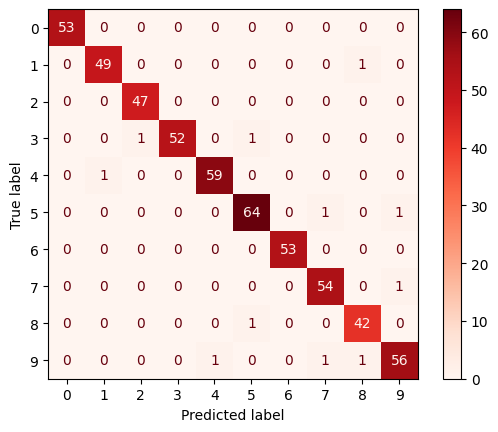

In [87]:
# matice záměn
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Reds,)

In [88]:
# přesnost
accuracy_score(y_test, y_pred)

0.9796296296296296